In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import sys
import h5py

In [2]:
sys.path.append("/home/surajrai1900/IWCD_ParticleGun-analysis")

In [3]:
import create_file
import utils
from Classification_model import run_model

In [4]:
df = create_file.relevant_df()

/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:3

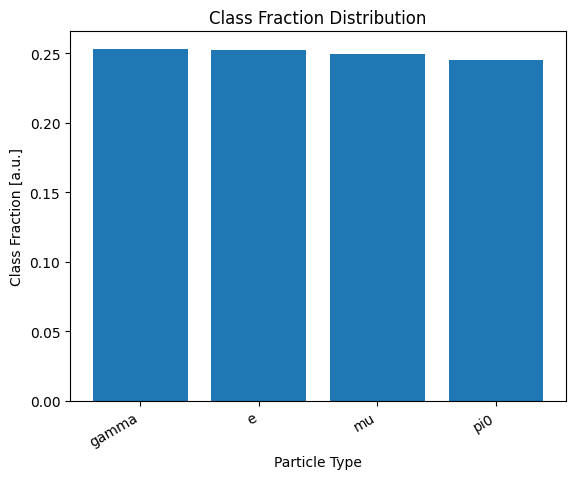

<Figure size 640x480 with 0 Axes>

In [5]:
# Plotting Class fraction for data before applying basic cuts

utils.plot_class_frac(df)

In [6]:
# Applying basic cuts to the data

df_base = df[utils.return_basic_cuts(df)]

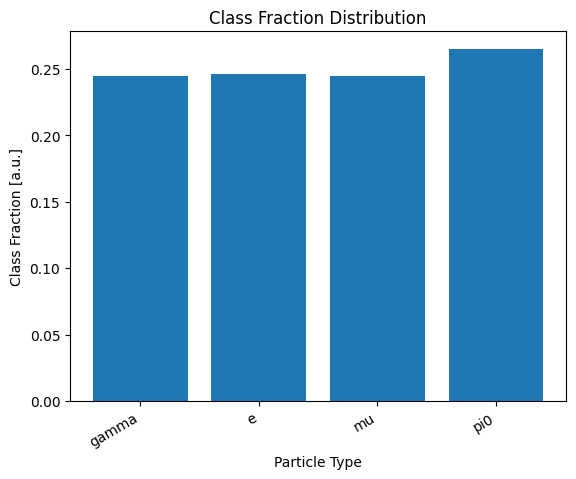

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting class fraction after applyig basic cuts

utils.plot_class_frac(df_base)

#### The relative class fraction should increase for electron signal events after basic cuts but it seems that the pi0 class fraction increases instead.

## e/mu seperation comparison between FiTQun, ResNet, and Classification_model

In [8]:
fq_emu_cuts = utils.return_fq_emu_cuts(df_base)
ml_emu_cuts = utils.return_ml_emu_cuts(df_base)

Using gbdt model


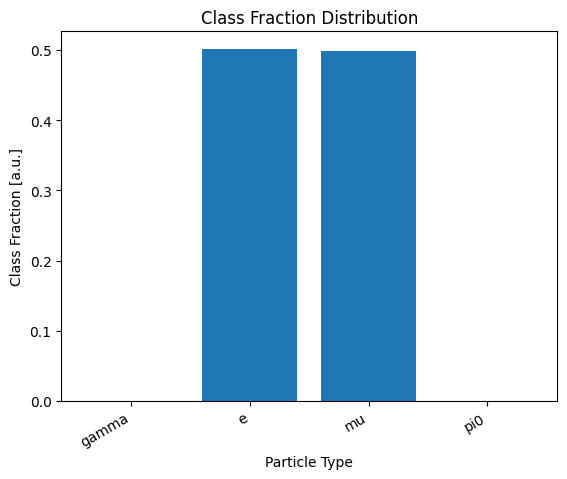

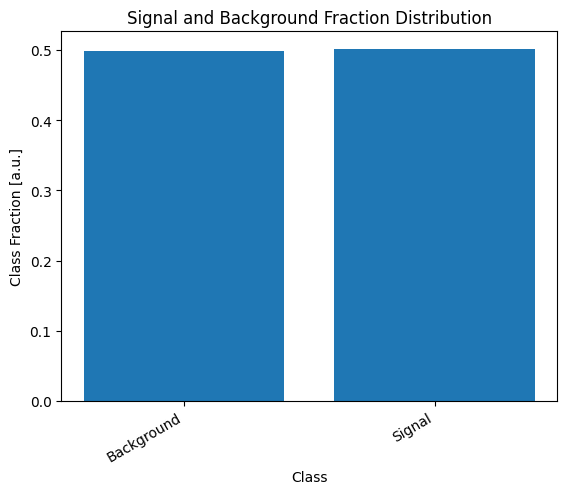

 The best threshold is : 0.3818181818181818


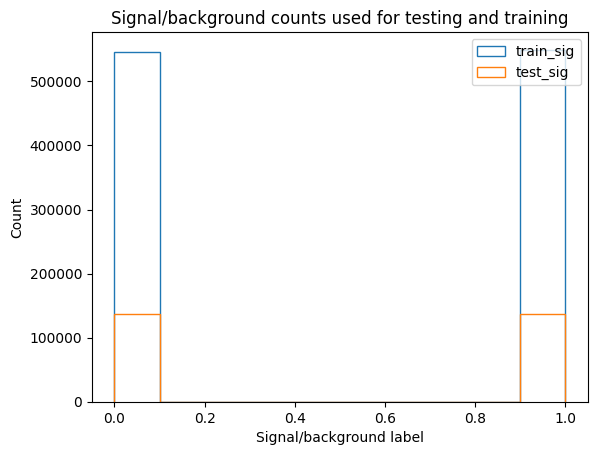

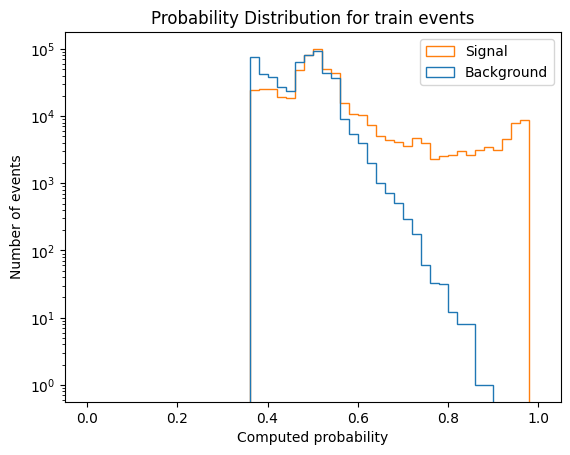

The train accuracy is:0.5503651047838861
The train f1 is:0.6789329710333892
The train precision is:0.5289344597841026
The train recall is:0.9476827037700994


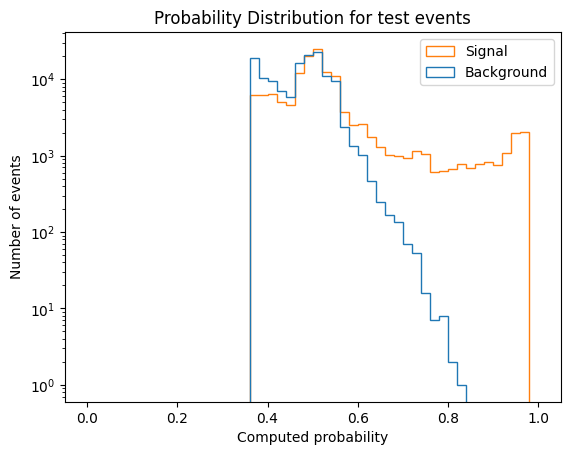

The test accuracy is:0.5489434896613178
The test f1 is:0.6774420165521492
The test precision is:0.5272743534079729
The test recall is:0.9472062163603036
{'e/mu_likelihood ratio': 0.0008966823965217222, 'reco_electron_mom': 0.3204335976054539, 'reco_electron_dwall': 0.07045398999417259, 'reco_electron_towall': 0.6082157300038518}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [9]:
# Using only FiTQun variables for training and testing the model

run_model(df_base, train_col=['e/mu_likelihood ratio', 'reco_electron_mom', 'reco_electron_dwall', 'reco_electron_towall', 'true_sig'], train_labels = [1, 2])

In [10]:
gbdt_fqemu_cuts = (df_base['gbdt_sig'].astype(bool))

In [11]:
print(f' Selection Efficiency and background rejection for fitqun cuts is : {utils.sg_eff(df_base, fq_emu_cuts, 1)} , {utils.bg_rej(df_base, fq_emu_cuts, 2)}')
print(f' Selection Efficiency and background rejection for softmax cuts is : {utils.sg_eff(df_base, ml_emu_cuts, 1)} , {utils.bg_rej(df_base, ml_emu_cuts, 2)}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_fqemu_cuts, 1)} , {utils.bg_rej(df_base, gbdt_fqemu_cuts, 2)}")

 Selection Efficiency and background rejection for fitqun cuts is : 0.8986325438821418 , 0.9648462674150194
 Selection Efficiency and background rejection for softmax cuts is : 0.9971692230588126 , 0.9987872467572033
 Selection Efficiency and background rejection for gbdt cuts is : 0.9475876477307164 , 0.1504546359982658


In [14]:
print(f'Precision, recall and f1_score for fitqun cuts is : {utils.f1(df_base, fq_emu_cuts, 1, 2)}')
print(f'Precision, recall and f1_score for softmax cuts is : {utils.f1(df_base, ml_emu_cuts, 1, 2)}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_fqemu_cuts, 1, 2)}')

Precision, recall and f1_score for fitqun cuts is : (0.9625457235240509, 0.8986325438821418, 0.9294917389496019)
Precision, recall and f1_score for softmax cuts is : (0.9987917153701685, 0.9971692230588126, 0.9979798097623817)
Precision, recall and f1_score for gbdt cuts is : (0.5286025790962678, 0.9475876477307164, 0.6786351317158933)


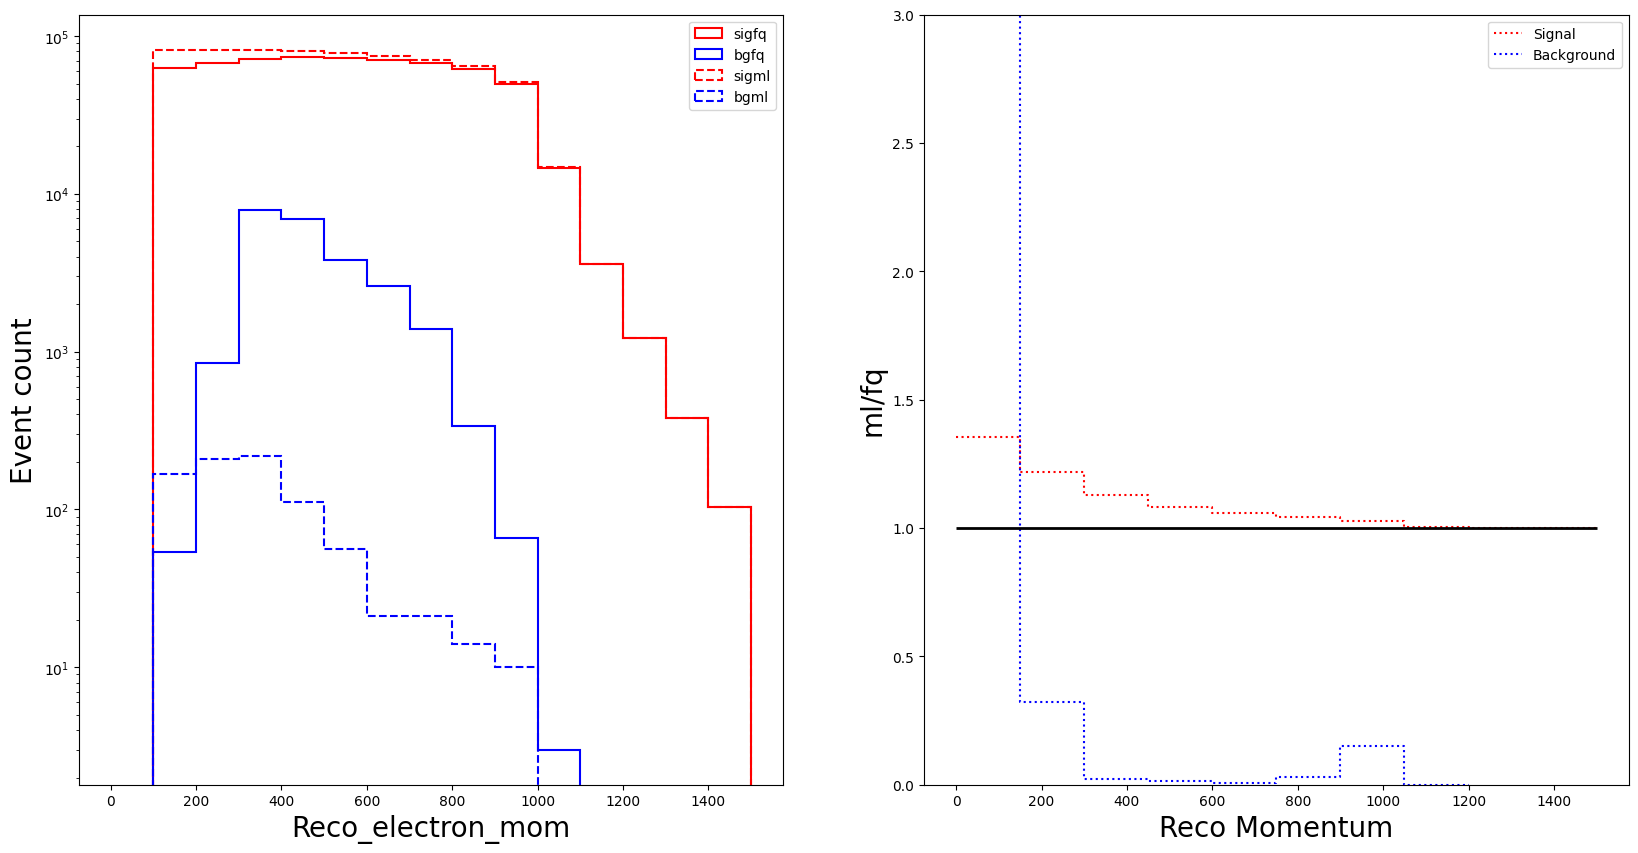

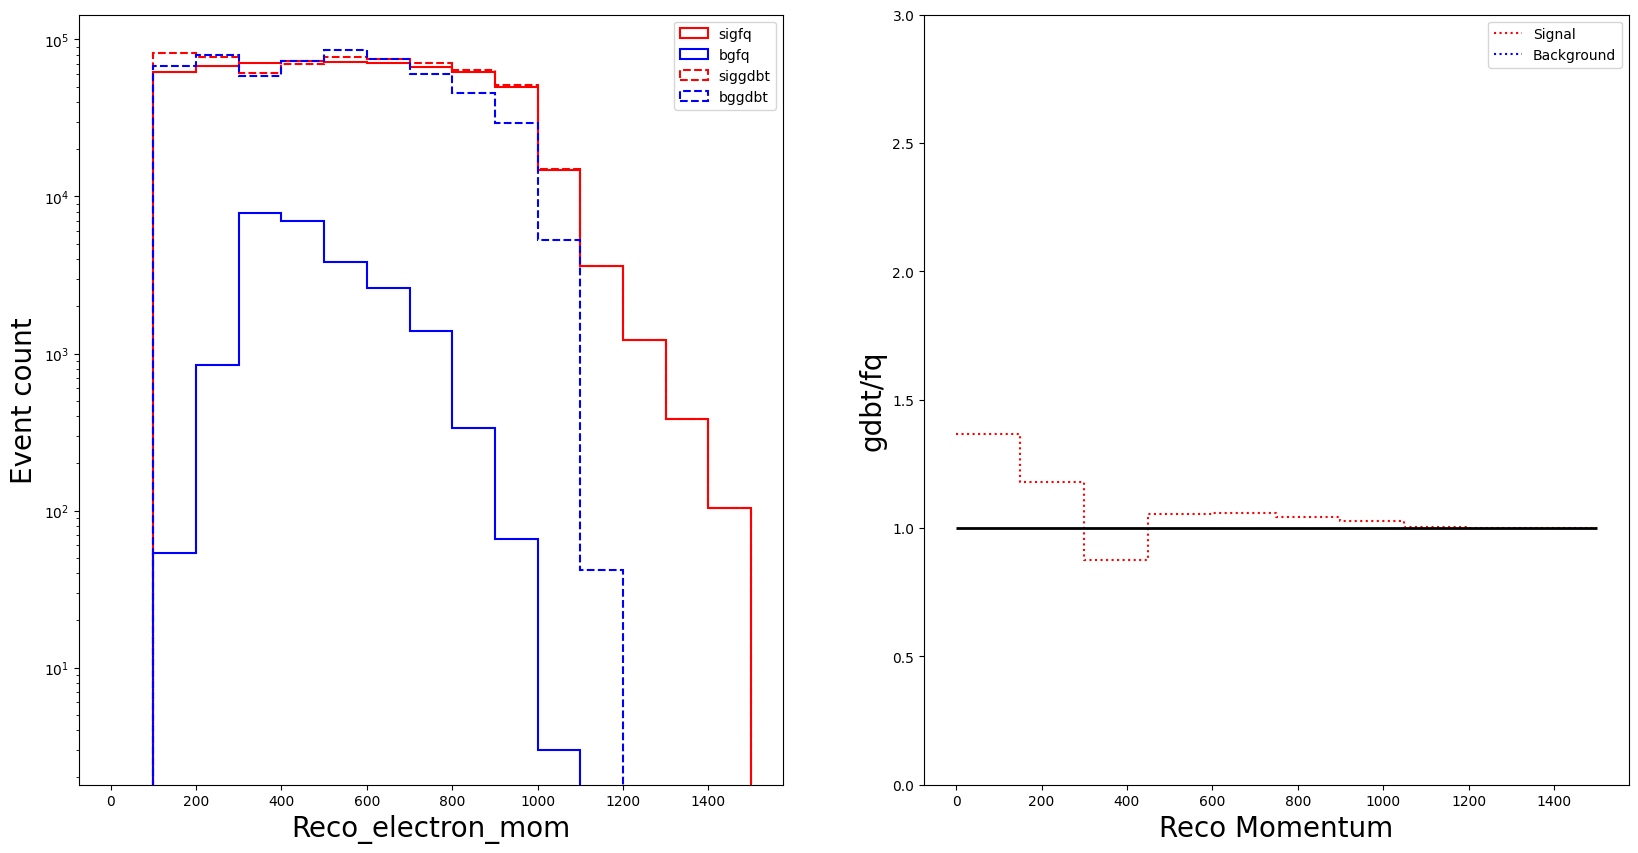

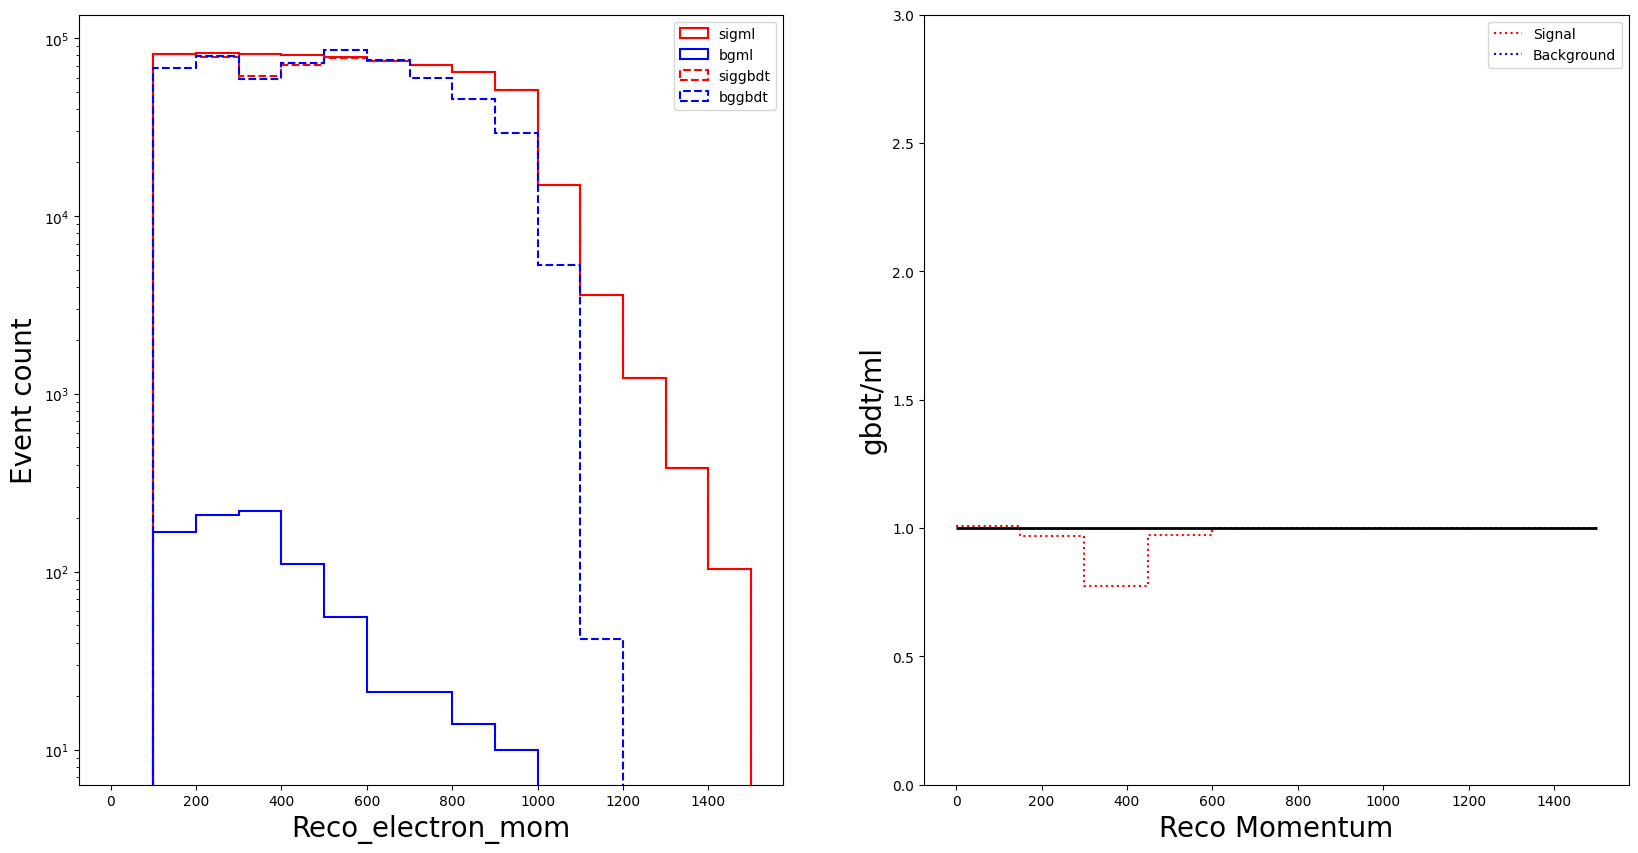

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gbdt/ml'>],
       dtype=object))

In [16]:
utils.plot_sel_comp(df_base, 1, 2, fq_emu_cuts, ml_emu_cuts, 'fq', 'ml')
utils.plot_sel_comp(df_base, 1, 2, fq_emu_cuts, gbdt_fqemu_cuts, 'fq', 'gdbt')
utils.plot_sel_comp(df_base, 1, 2, ml_emu_cuts, gbdt_fqemu_cuts, 'ml', 'gbdt')

**Observations from GBDT Model Using Fitqun Variables**

The GBDT model, trained on fitqun variables, does not show well seperated probability distributions for signal and background events. Despite achieving a high recall rate, indicating effective identification of true positive signal events, the precision is relatively low. Consequently, the model tends to classify numerous background events as signal events. This imbalance in precision and recall results in a low F1 score.


Using gbdt model


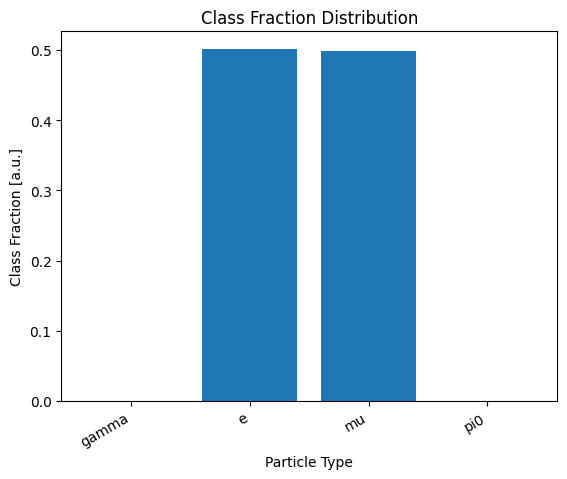

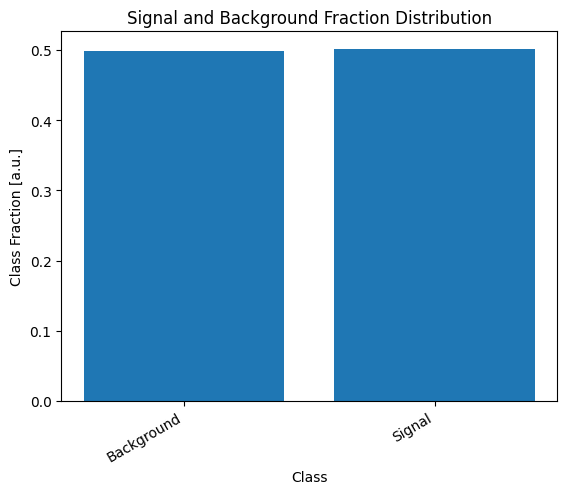

 The best threshold is : 0.4727272727272727


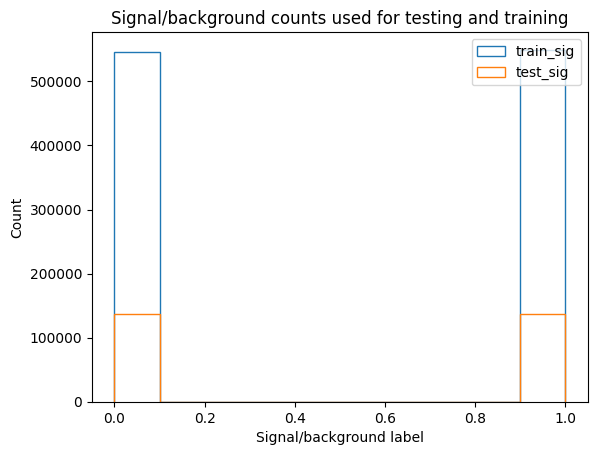

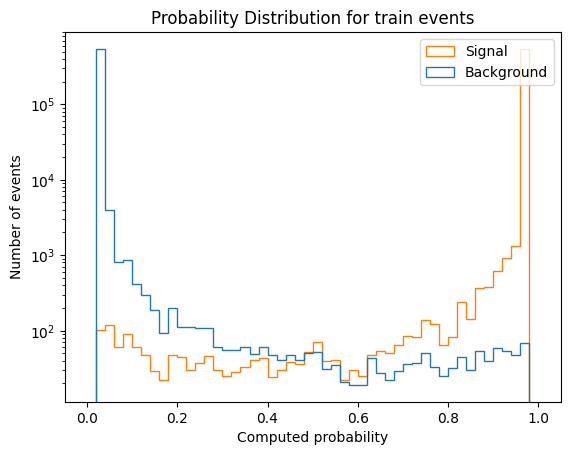

The train accuracy is:0.998153933800906
The train f1 is:0.9981598810384021
The train precision is:0.9982216543165382
The train recall is:0.9980981154052652


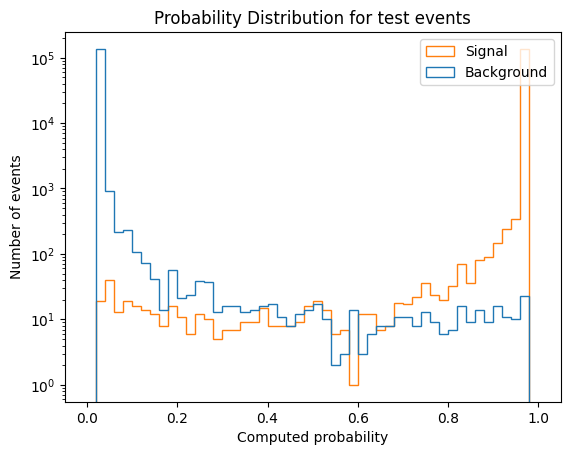

The test accuracy is:0.9980425525698802
The test f1 is:0.9980426669393299
The test precision is:0.9981009838364509
The test recall is:0.997984356856473
{'pe': 0.0007581076586078493, 'pmu': 0.99898828349889, 'reco_electron_mom': 0.000253608842502083}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [17]:
# Using only softmax variables for training and testing the model

run_model(df_base, train_col=['pe', 'pmu', 'reco_electron_mom', 'true_sig'], train_labels = [1, 2])

In [18]:
gbdt_mlemu_cuts = (df_base['gbdt_sig'].astype(bool))

In [19]:
print(f' Selection Efficiency and background rejection for fitqun cuts is : {utils.sg_eff(df_base, fq_emu_cuts, 1)} , {utils.bg_rej(df_base, fq_emu_cuts, 2)}')
print(f' Selection Efficiency and background rejection for softmax cuts is : {utils.sg_eff(df_base, ml_emu_cuts, 1)} , {utils.bg_rej(df_base, ml_emu_cuts, 2)}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_mlemu_cuts, 1)} , {utils.bg_rej(df_base, gbdt_mlemu_cuts, 2)}")

 Selection Efficiency and background rejection for fitqun cuts is : 0.8986325438821418 , 0.9648462674150194
 Selection Efficiency and background rejection for softmax cuts is : 0.9971692230588126 , 0.9987872467572033
 Selection Efficiency and background rejection for gbdt cuts is : 0.9980754213384927 , 0.9981881935249522


In [20]:
print(f'Precision, recall and f1_score for fitqun cuts is : {utils.f1(df_base, fq_emu_cuts, 1, 2)}')
print(f'Precision, recall and f1_score for softmax cuts is : {utils.f1(df_base, ml_emu_cuts, 1, 2)}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_mlemu_cuts, 1, 2)}')

Precision, recall and f1_score for fitqun cuts is : (0.9625457235240509, 0.8986325438821418, 0.9294917389496019)
Precision, recall and f1_score for softmax cuts is : (0.9987917153701685, 0.9971692230588126, 0.9979798097623817)
Precision, recall and f1_score for gbdt cuts is : (0.9981975812326971, 0.9980754213384927, 0.9981364975478697)


/home/surajrai1900/IWCD_ParticleGun-analysis/utils.py:287: RuntimeWarning: invalid value encountered in long_scalars
  vals_y_bg = np.concatenate((vals_y_bg, np.array([hist_cut2_bg[j] / hist_cut1_bg[j] for i in range(10)])))


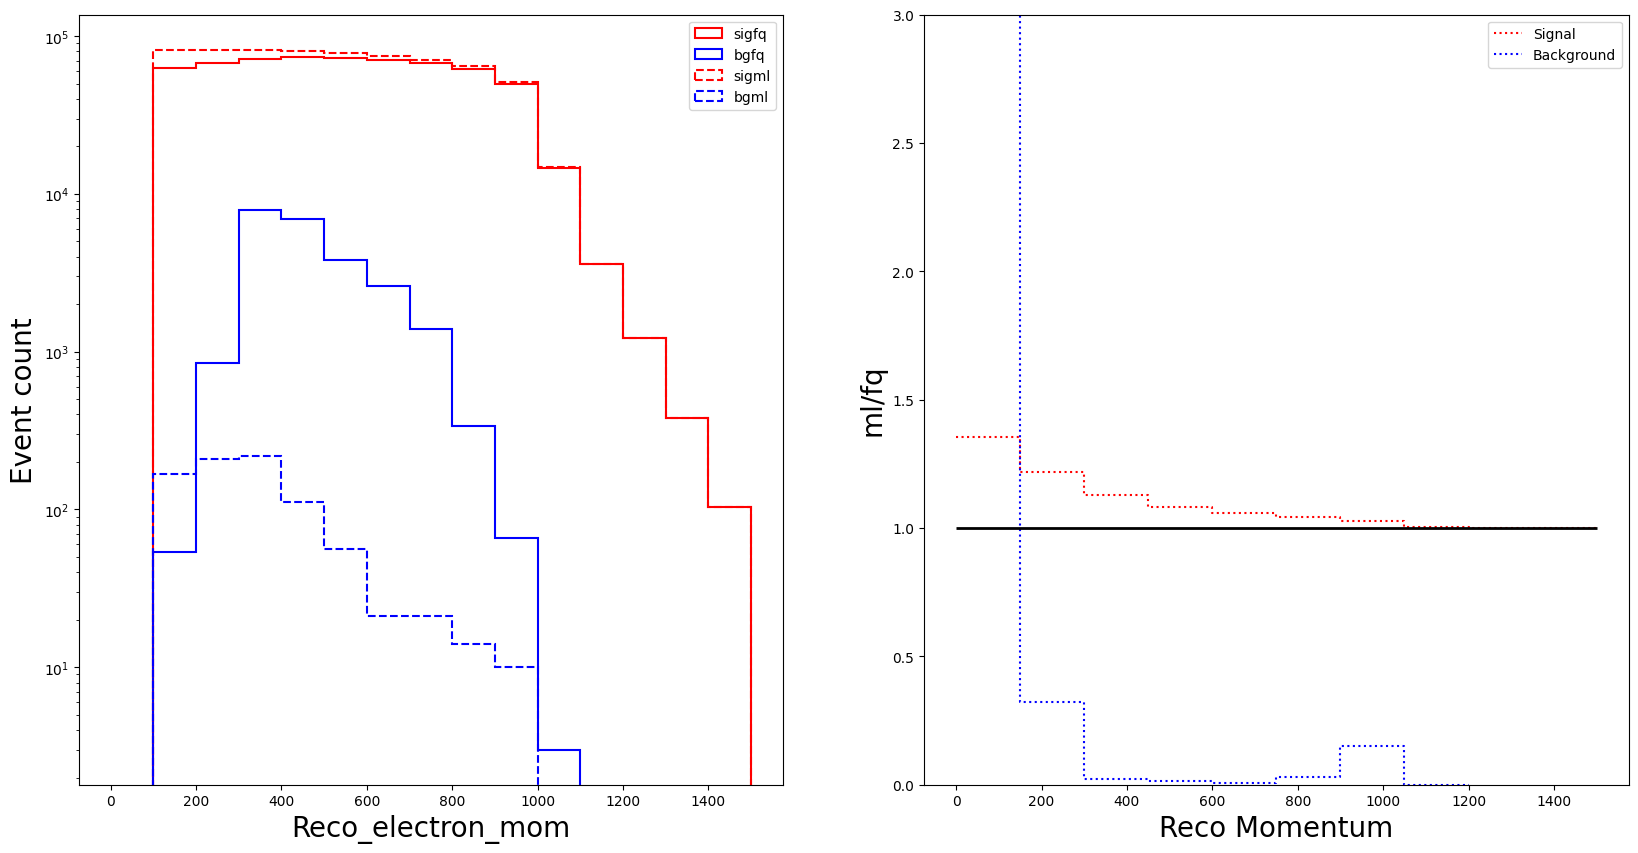

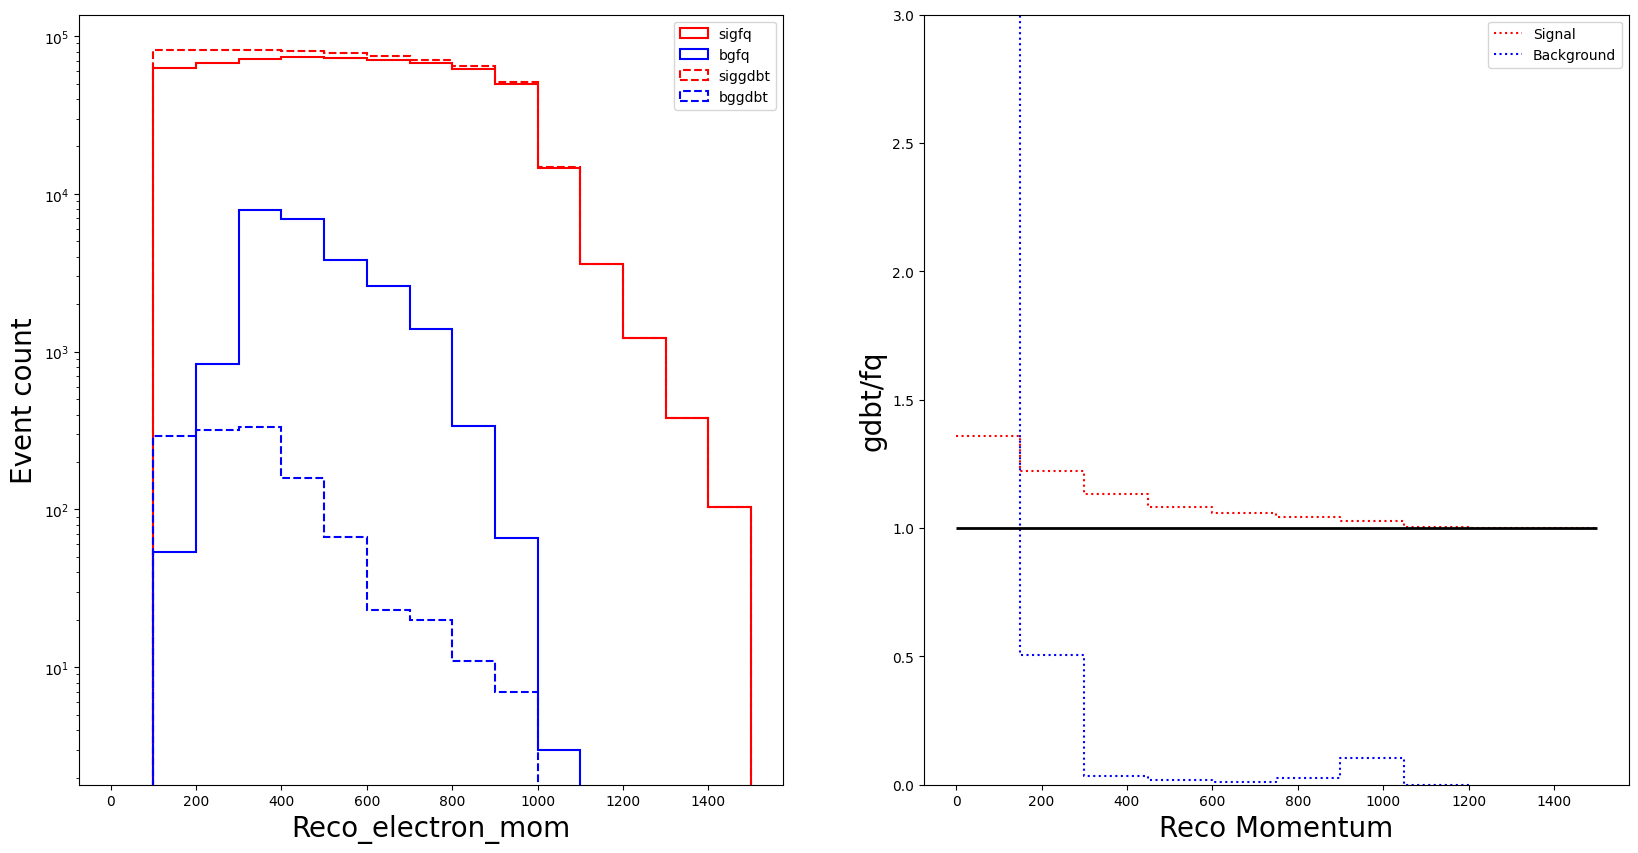

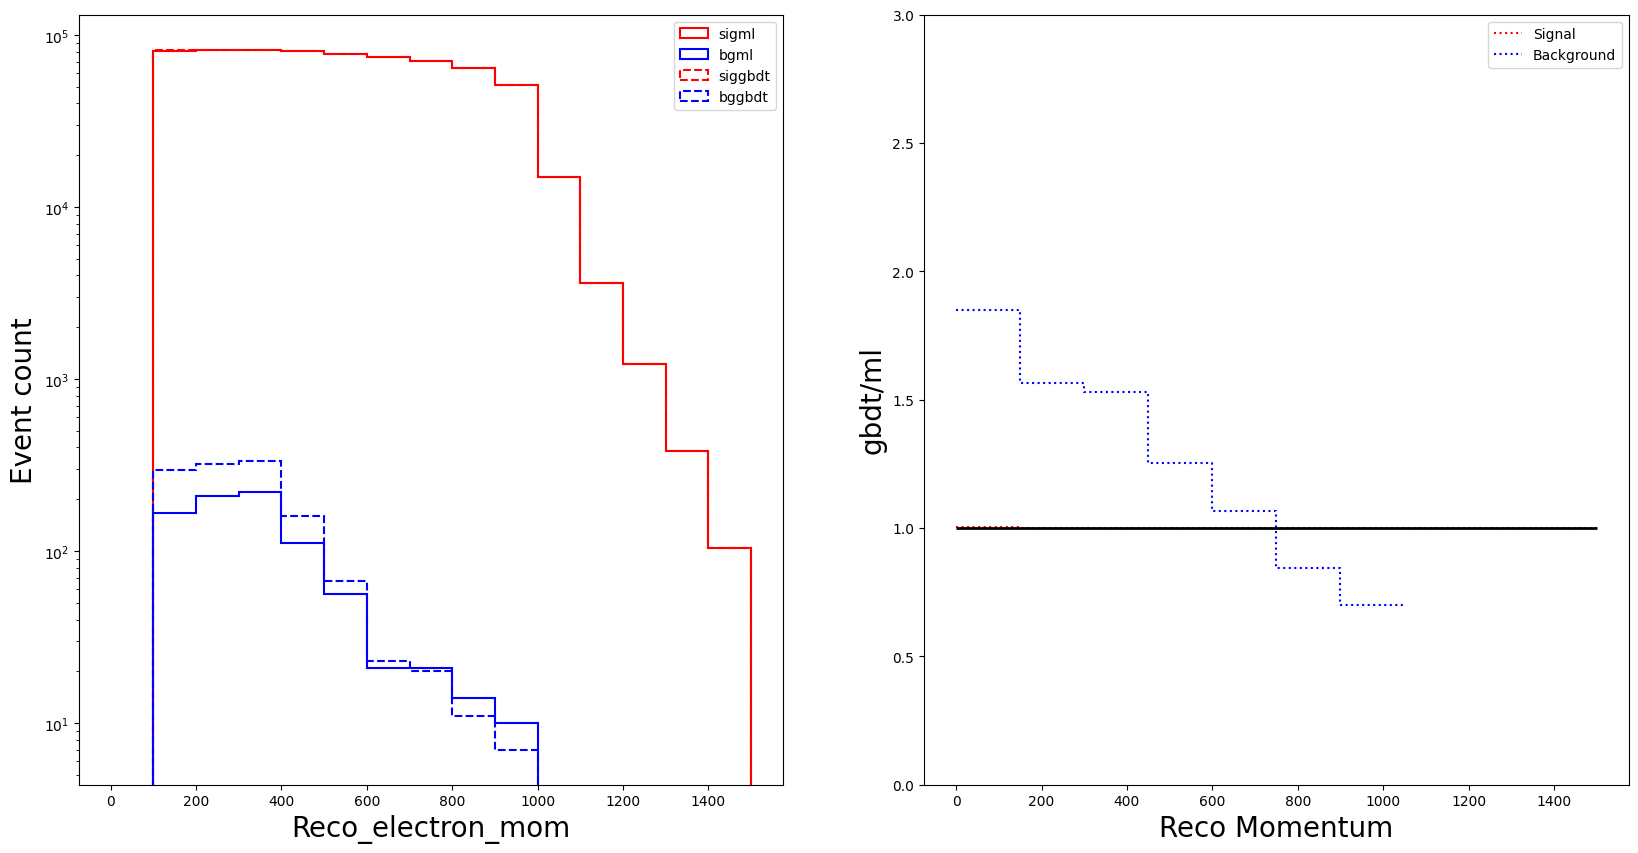

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gbdt/ml'>],
       dtype=object))

In [21]:
utils.plot_sel_comp(df_base, 1, 2, fq_emu_cuts, ml_emu_cuts, 'fq', 'ml')
utils.plot_sel_comp(df_base, 1, 2, fq_emu_cuts, gbdt_mlemu_cuts, 'fq', 'gdbt')
utils.plot_sel_comp(df_base, 1, 2, ml_emu_cuts, gbdt_mlemu_cuts, 'ml', 'gbdt')

In [22]:
fq_ml_emu = (fq_emu_cuts & ml_emu_cuts)

Using gbdt model


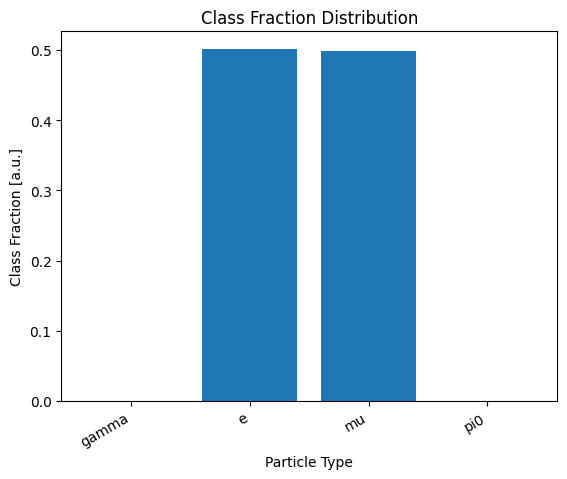

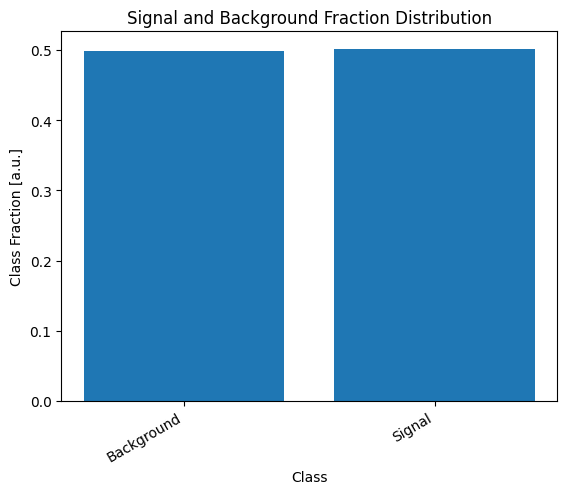

 The best threshold is : 0.5454545454545454


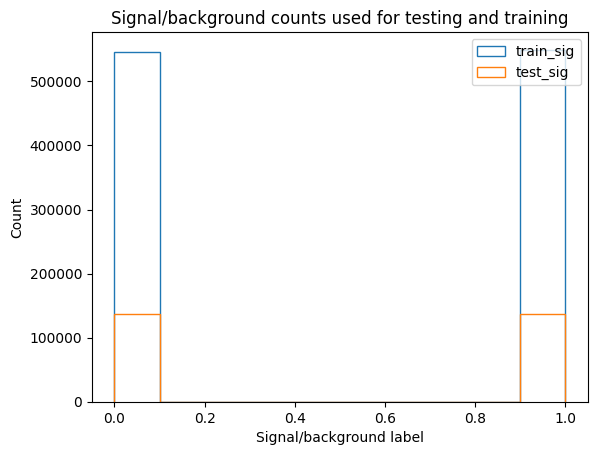

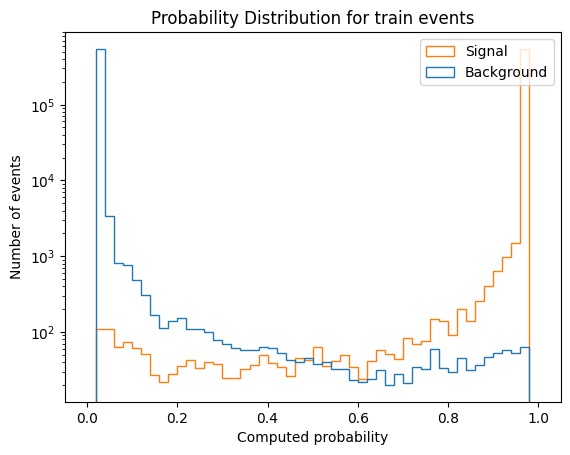

The train accuracy is:0.9981658026736006
The train f1 is:0.9981711541210023
The train precision is:0.9985374791458732
The train recall is:0.997805097778708


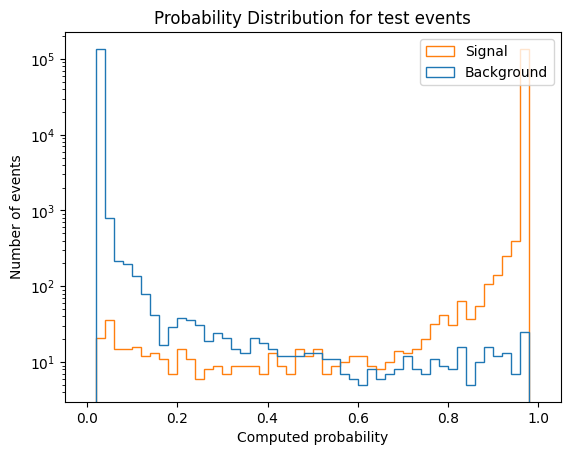

The test accuracy is:0.9980717682031656
The test f1 is:0.9980712751501337
The test precision is:0.998443289701594
The test recall is:0.9976995377166269
{'pe': 0.0006290837638085893, 'e/mu_likelihood ratio': 0.0, 'reco_electron_towall': 0.00023388176139023064, 'reco_electron_dwall': 9.634378885447887e-05, 'pmu': 0.9988906262710995, 'reco_electron_mom': 0.00015006441484718904}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [23]:
# Using both softmax and fiTQun variables for training and testing the model

run_model(df_base, train_col=['pe', 'e/mu_likelihood ratio', 'reco_electron_towall', 'reco_electron_dwall', 'pmu', 'reco_electron_mom', 'true_sig'], train_labels = [1, 2])

In [24]:
gbdt_cuts = (df_base['gbdt_sig'].astype(bool))

In [25]:
print(f' Selection Efficiency and background rejection for fq+softmax cuts is : {utils.sg_eff(df_base, fq_ml_emu, 1)} , {utils.bg_rej(df_base, fq_ml_emu, 2)}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_cuts, 1)} , {utils.bg_rej(df_base, gbdt_cuts, 2)}")

 Selection Efficiency and background rejection for fq+softmax cuts is : 0.8977423716170541 , 0.999584031496432
 Selection Efficiency and background rejection for gbdt cuts is : 0.9977840392549943 , 0.998511887325264


In [26]:
print(f'Precision, recall and f1_score for fq+softmax cuts is : {utils.f1(df_base, fq_ml_emu, 1, 2)}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_cuts, 1, 2)}')

Precision, recall and f1_score for fq+softmax cuts is : (0.9995393200103815, 0.8977423716170541, 0.9459099338073659)
Precision, recall and f1_score for gbdt cuts is : (0.9985186891565422, 0.9977840392549943, 0.9981512290282548)


/home/surajrai1900/IWCD_ParticleGun-analysis/utils.py:287: RuntimeWarning: invalid value encountered in long_scalars
  vals_y_bg = np.concatenate((vals_y_bg, np.array([hist_cut2_bg[j] / hist_cut1_bg[j] for i in range(10)])))


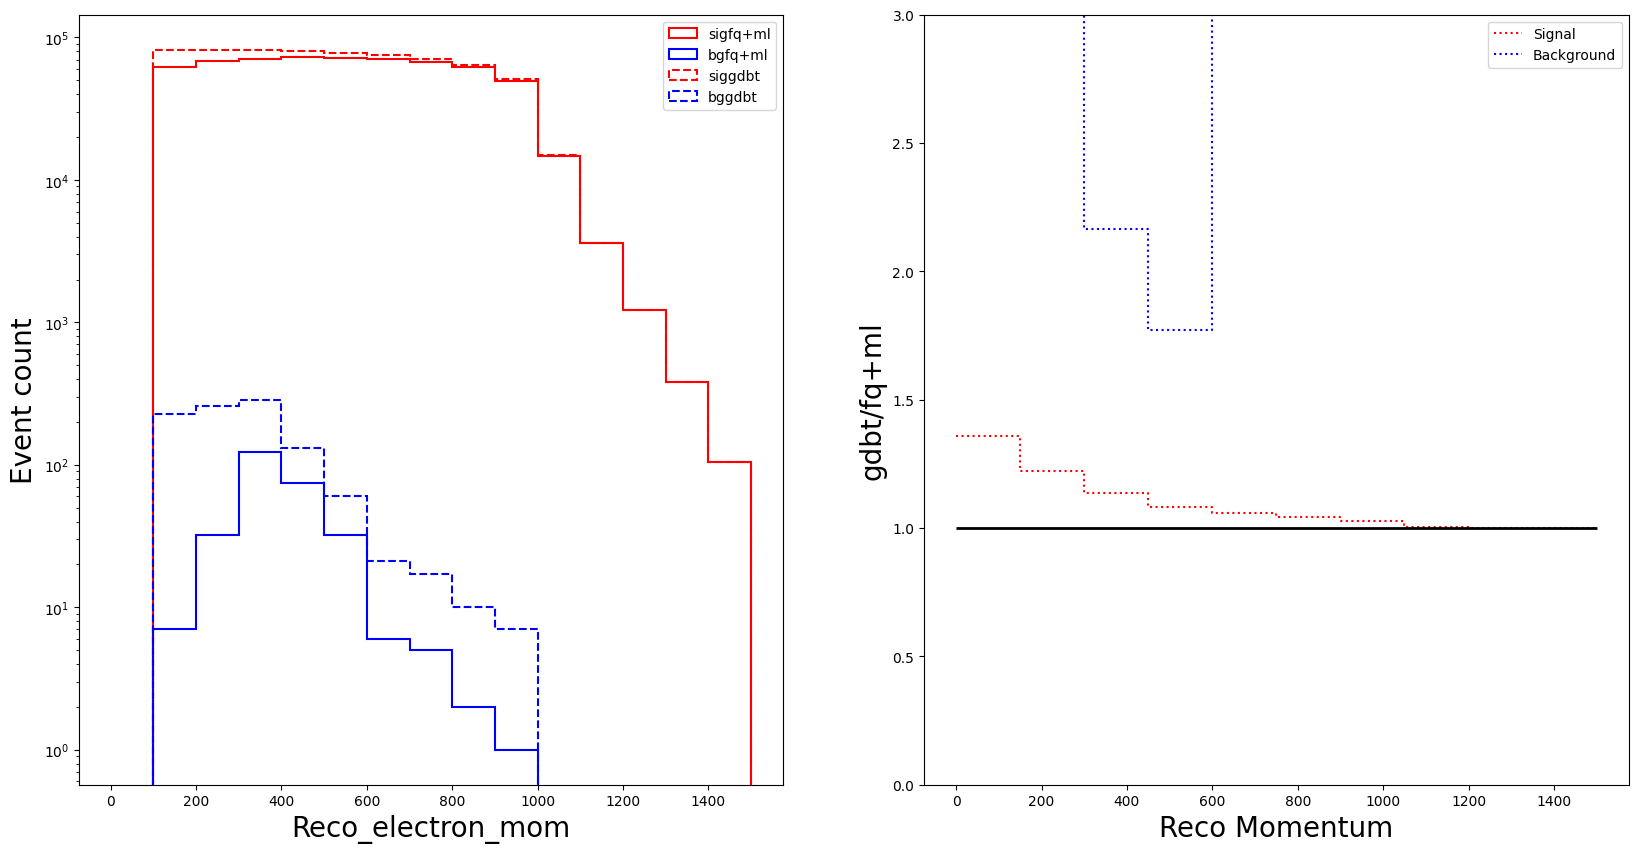

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gdbt/fq+ml'>],
       dtype=object))

In [27]:
utils.plot_sel_comp(df_base, 1, 2, fq_ml_emu, gbdt_cuts, 'fq+ml', 'gdbt')